# **Model Creation and Evaluation Notebook**

## Objectives
Answer business requirement 2:
The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs
* 'inputs/leaves_dataset/cherry-leaves/processed_images/test'
* 'inputs/leaves_dataset/cherry-leaves/processed_images/train'
* 'inputs/leaves_dataset/cherry-leaves/processed_images/validation'
* image shape embeddings.

## Outputs
* Machine learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Predictions on Test set of images 'not seen' before.

---

### Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import tensorflow as tf
import keras

2025-04-07 15:41:19.543721: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 15:41:19.545252: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 15:41:19.548329: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 15:41:19.557105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744040479.571771   15438 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744040479.57

### Set Working Directory

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-Cherry-Leaves/jupyter_notebooks'

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [5]:
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-Cherry-Leaves'

---

Model Packages

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

Image Shapes Declaration

In [7]:
import os
import pickle

# Settings
file_path = '/workspaces/PP5-Cherry-Leaves/outputs'  # Same directory
file_prefix = 'image_shape'
file_extension = '.pkl'

# Get list of all matching pickle files
existing_files = [
    f for f in os.listdir(file_path)
    if f.startswith(file_prefix + '_') and f.endswith(file_extension)
]

if not existing_files:
    raise FileNotFoundError("❌ No image_shape pickle files found!")

# Sort files by number suffix (e.g., image_shape_1.pkl → 1)
existing_files.sort(key=lambda x: int(x[len(file_prefix) + 1:-len(file_extension)]))

# Load the most recent one
latest_file = existing_files[-1]
latest_path = os.path.join(file_path, latest_file)

with open(latest_path, 'rb') as f:
    image_shape = pickle.load(f)

print(f"✅ Loaded image shape from: {latest_path}")
print("Image shape:", image_shape)

✅ Loaded image shape from: /workspaces/PP5-Cherry-Leaves/outputs/image_shape_1.pkl
Image shape: (100, 100, 3)


Retrieving Class Indices

In [8]:
import os
import pickle

# Settings
file_path = '/workspaces/PP5-Cherry-Leaves/outputs'  # Same directory
file_prefix = 'class_indices'
file_extension = '.pkl'

# Get list of all matching pickle files
existing_files = [
    f for f in os.listdir(file_path)
    if f.startswith(file_prefix + '_') and f.endswith(file_extension)
]

if not existing_files:
    raise FileNotFoundError("❌ No class_indices pickle files found!")

# Sort files by number suffix (e.g., class_indices_1.pkl → 1)
existing_files.sort(key=lambda x: int(x[len(file_prefix) + 1:-len(file_extension)]))

# Load the most recent one
latest_file = existing_files[-1]
latest_path = os.path.join(file_path, latest_file)

with open(latest_path, 'rb') as f:
    class_indices = pickle.load(f)

print(f"✅ Loaded class indices from: {latest_path}")
print("Class Indices:", class_indices)

✅ Loaded class indices from: /workspaces/PP5-Cherry-Leaves/outputs/class_indices_1.pkl
Class Indices: {'healthy': 0, 'powdery_mildew': 1}


Model

In [10]:
def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

Model Summary

In [11]:
create_tf_model().summary()

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-07 15:44:56.727917: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875,777 (3.34 MB)

 Trainable params: 875,777 (3.34 MB)

 Non-trainable params: 0 (0.00 B)

Implementing Early Stopping

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the batch_size
batch_size = 10

# Define train and validation generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    'inputs/leaves_dataset/cherry-leaves/processed_images/train', 
    target_size=(100, 100), 
    batch_size=batch_size, 
    class_mode='binary'
)

validation_set = validation_datagen.flow_from_directory(
    'inputs/leaves_dataset/cherry-leaves/processed_images/validation', 
    target_size=(100, 100), 
    batch_size=batch_size, 
    class_mode='binary'
)

model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

import pandas as pd

# Train the model and capture the history object
history = model.fit(train_set,
                    epochs=25,
                    steps_per_epoch=len(train_set) // batch_size,
                    validation_data=validation_set,
                    validation_steps=len(validation_set) // batch_size,
                    callbacks=[early_stop],
                    verbose=1)

# Convert the history to a DataFrame
history_df = pd.DataFrame(history.history)

# Save the DataFrame to a CSV file
history_df.to_csv('outputs/training_history.csv', index=False)

Found 2944 images belonging to 2 classes.
Found 630 images belonging to 2 classes.


Epoch 1/25


/home/cistudent/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


294/294 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.7189 - loss: 0.5076 - val_accuracy: 0.9825 - val_loss: 0.0495
Epoch 2/25
  1/294 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 1.0000 - loss: 0.0203

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 0.9873 - val_loss: 0.0458
Epoch 3/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9771 - loss: 0.0678 - val_accuracy: 0.9937 - val_loss: 0.0282
Epoch 4/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 0.9937 - val_loss: 0.0288
Epoch 5/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9922 - loss: 0.0281 - val_accuracy: 0.9952 - val_loss: 0.0117
Epoch 6/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.6386e-04 - val_accuracy: 0.9952 - val_loss: 0.0117
Epoch 7/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9946 - loss: 0.0207 - val_accuracy: 0.9952 - val_loss: 0.0077
Epoch 8/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.6157e-05 - val_accuracy: 0.9937 - val_loss: 0.0192
Epoch 9/25
294/294 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9951 - loss: 0.0214 - val_accurac

Plots for training and validation loss as well as training and validation accuracy.

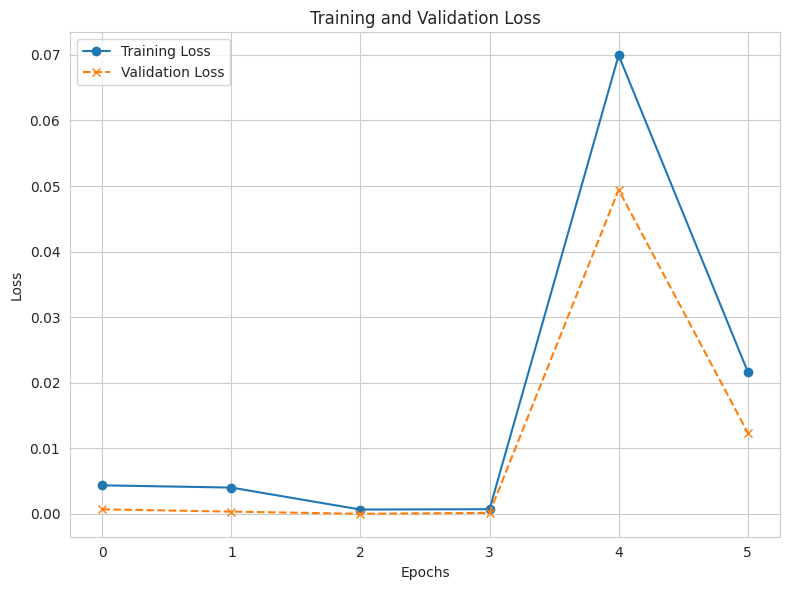

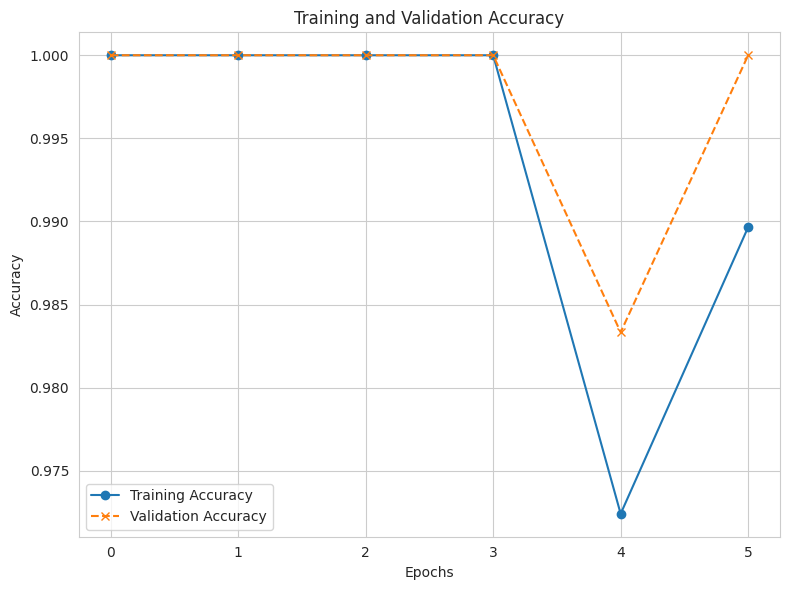

In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a new directory to save the plots, inside 'outputs'
plots_dir = 'outputs/training_plots'
os.makedirs(plots_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Get the training history
history = model.history.history

# Plot 1: Loss vs. Validation Loss
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
plt.plot(history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history['val_loss'], label='Validation Loss', linestyle='--', marker='x')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig(f'{plots_dir}/model_training_loss.png', bbox_inches='tight', dpi=150)
plt.show()

# Plot 2: Accuracy vs. Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='x')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.savefig(f'{plots_dir}/model_training_accuracy.png', bbox_inches='tight', dpi=150)
plt.show()

Model Training

In [33]:
from keras.models import load_model
model = load_model('outputs/cherry_leaf_model.h5')

In [34]:
# Ensure that the model is compiled before fitting
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now train the model
history = model.fit(train_set,
                    epochs=25,
                    steps_per_epoch=len(train_set) // batch_size,
                    validation_data=validation_set,
                    validation_steps=len(validation_set) // batch_size,
                    callbacks=[early_stop],
                    verbose=1)

# After training, you can access the metrics in the history object
history_df = pd.DataFrame(history.history)
history_df.to_csv('outputs/training_history.csv', index=False)

Epoch 1/25


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9892 - loss: 0.0152 - val_accuracy: 0.9833 - val_loss: 0.0295
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9721 - loss: 0.1335 - val_accuracy: 0.9833 - val_loss: 0.0267
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9846 - loss: 0.0338 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9754 - loss: 0.0495 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9988 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9928 - loss: 0.0183 - val_accuracy: 0.9667 - val_loss: 0.0544
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9833 - val_loss: 0.

In [35]:
# Evaluate the model on the validation data.
evaluation_metrics = model.evaluate(train_set)

# Output the evaluation result
print(f"Evaluation result: {evaluation_metrics}")

295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9988 - loss: 0.0092
Evaluation result: [0.006407253909856081, 0.9989809989929199]


In [36]:
# Evaluate the model on the validation data.
evaluation_metrics = model.evaluate(validation_set)

# Output the evaluation result
print(f"Evaluation result: {evaluation_metrics}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9953 - loss: 0.0171
Evaluation result: [0.03397255390882492, 0.9904761910438538]


In [38]:
import pandas as pd

# Updated evaluation results
evaluation_results = {
    'Metric': ['Training Loss', 'Training Accuracy', 'Test Loss', 'Test Accuracy'],
    'Value': [0.0064, 0.99898, 0.03397, 0.99048]
}

# Convert to DataFrame
results_df = pd.DataFrame(evaluation_results)

# Save to CSV
results_df.to_csv('outputs/model_evaluation_results.csv', index=False)

# Print to verify
print(results_df)

              Metric    Value
0      Training Loss  0.00640
1  Training Accuracy  0.99898
2          Test Loss  0.03397
3      Test Accuracy  0.99048


---

Preparing model for analysis on testing dataset which the model has not 'seen'.

In [21]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your main image folder
image_folder = "inputs/leaves_dataset/cherry-leaves/processed_images/test"  # Change this to your image folder path

# Initialize an empty list to store the images
test_set = []

# Iterate through each folder in the main folder (i.e., 'powdery_mildew', 'healthy')
for class_folder in os.listdir(image_folder):
    class_folder_path = os.path.join(image_folder, class_folder)

    # Skip if it's not a folder
    if os.path.isdir(class_folder_path):
        for filename in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, filename)

            # Make sure to skip non-image files (e.g., hidden files)
            if os.path.isfile(img_path):
                # Load and preprocess image
                img = image.load_img(img_path, target_size=(100, 100))
                img_array = image.img_to_array(img)  # Convert to numpy array
                test_set.append(img_array)

# Convert the list of images into a numpy array
test_set = np.array(test_set)

print("Shape of test_set:", test_set.shape)  # Should be (num_samples, 100, 100, 3)



Shape of test_set: (634, 100, 100, 3)


Generation of a confusion matrix and classification report

In [22]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# Assuming `test_set` is already loaded with images (as you have confirmed)
# Initialize lists to collect true labels and predictions
all_preds = []
all_labels = []

batch_size = 10  # Example batch size, adjust as needed

# Define a mapping for labels
class_mapping = {"healthy": 0, "powdery_mildew": 1}

# Create labels for the test_set based on subfolders
test_labels = []

# Loop through each image in test_set and assign the correct label based on its folder
image_folder = "inputs/leaves_dataset/cherry-leaves/processed_images/test"  # Replace with your image folder path
for class_folder in os.listdir(image_folder):
    class_folder_path = os.path.join(image_folder, class_folder)
    if os.path.isdir(class_folder_path):
        label = class_mapping.get(class_folder, -1)  # Get label for class folder
        for filename in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, filename)
            if os.path.isfile(img_path):
                test_labels.append(label)

# Convert labels to numpy array (should match the number of images in test_set)
test_labels = np.array(test_labels)

# Loop through the test set in batches
for i in range(0, len(test_set), batch_size):
    # Get the current batch of images
    batch_X = test_set[i:i + batch_size]
    
    # Get the corresponding batch labels
    batch_y = test_labels[i:i + batch_size]

    # Make predictions for this batch
    raw_preds = model(batch_X)  # Get model predictions (raw output)
    preds = tf.cast(raw_preds >= 0.5, tf.int32).numpy()  # Convert to binary labels (0 or 1)

    # Collect predictions and true labels
    all_preds.extend(preds.flatten())
    all_labels.extend(batch_y.flatten())  # Ensure this matches your label shape

# Now compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Generate classification report (precision, recall, F1-score)
class_report = classification_report(all_labels, all_preds)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[314   3]
 [  1 316]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       317
           1       0.99      1.00      0.99       317

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



A Confusion Matrix Plot showing True and False positives and negatives.

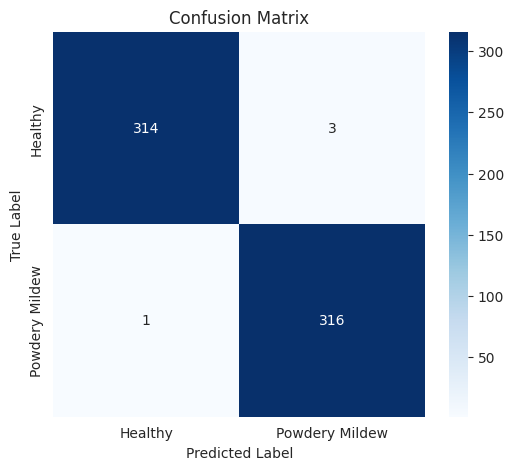

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plotting the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Powdery Mildew"], yticklabels=["Healthy", "Powdery Mildew"])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

Preparing the data to generate a roc curve and AUC

In [24]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

# Load the CSV file containing image paths and labels
df = pd.read_csv('/workspaces/PP5-Cherry-Leaves/outputs/test_dataframe.csv')

X_test = []
y_test = []

# Load images and corresponding labels
for idx, row in df.iterrows():
    img_path = row['file']  # Assuming the column is named 'file'
    label = row['label']  # Assuming the column is named 'label'
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img) / 255.0  # Normalize image
    X_test.append(img_array)
    
    y_test.append(label)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

Generating AUC and a ROC curve based on the Cherry Leaf Data.

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode y_test to 0 and 1 (0: healthy, 1: powdery mildew)
y_test_encoded = label_encoder.fit_transform(y_test)  # This will convert 'healthy' to 0 and 'powdery_mildew' to 1

# Now you can compute the ROC curve
y_prob = model.predict(X_test)  # Predict probabilities for ROC/AUC

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)  # Use the encoded y_test
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC: {roc_auc}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
AUC: 0.9993531630327697


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
AUC: 0.9984


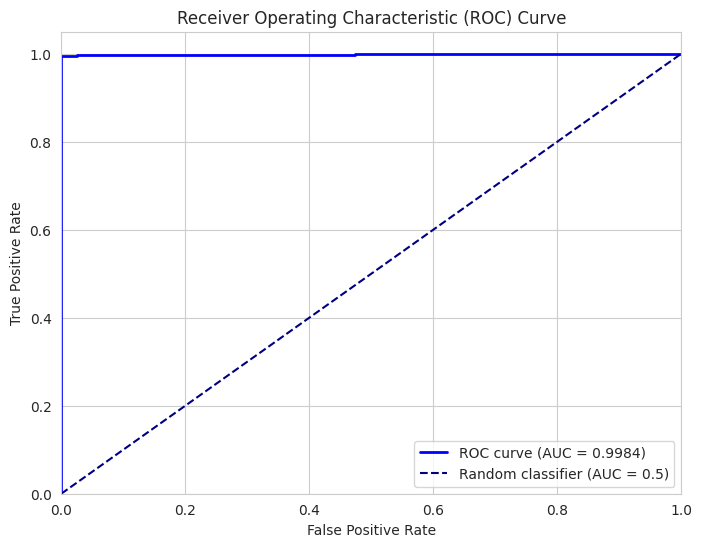

ROC curve saved to: /workspaces/PP5-Cherry-Leaves/outputs/training_plots/roc_curve.png


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import os

# Load the model
model = tf.keras.models.load_model('/workspaces/PP5-Cherry-Leaves/outputs/cherry_leaf_model.h5')

# Recompile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # Assuming binary classification
              metrics=['accuracy', 'loss'])  # You can add more metrics if needed

# Assuming 'X_test' and 'y_test' are your test dataset and true labels
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode y_test to 0 and 1 (0: healthy, 1: powdery mildew)
y_test_encoded = label_encoder.fit_transform(y_test)  # This will convert 'healthy' to 0 and 'powdery_mildew' to 1

# Predict probabilities for ROC/AUC
y_prob = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Define the output directory
output_dir = '/workspaces/PP5-Cherry-Leaves/outputs/training_plots'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the ROC curve as a PNG file in the specified directory
roc_curve_path = os.path.join(output_dir, 'roc_curve.png')
plt.savefig(roc_curve_path)

# Optionally, you can also show the plot
plt.show()

# Print the file path where it is saved
print(f"ROC curve saved to: {roc_curve_path}")


Sample images showing predictions vs true values

Found 634 images belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


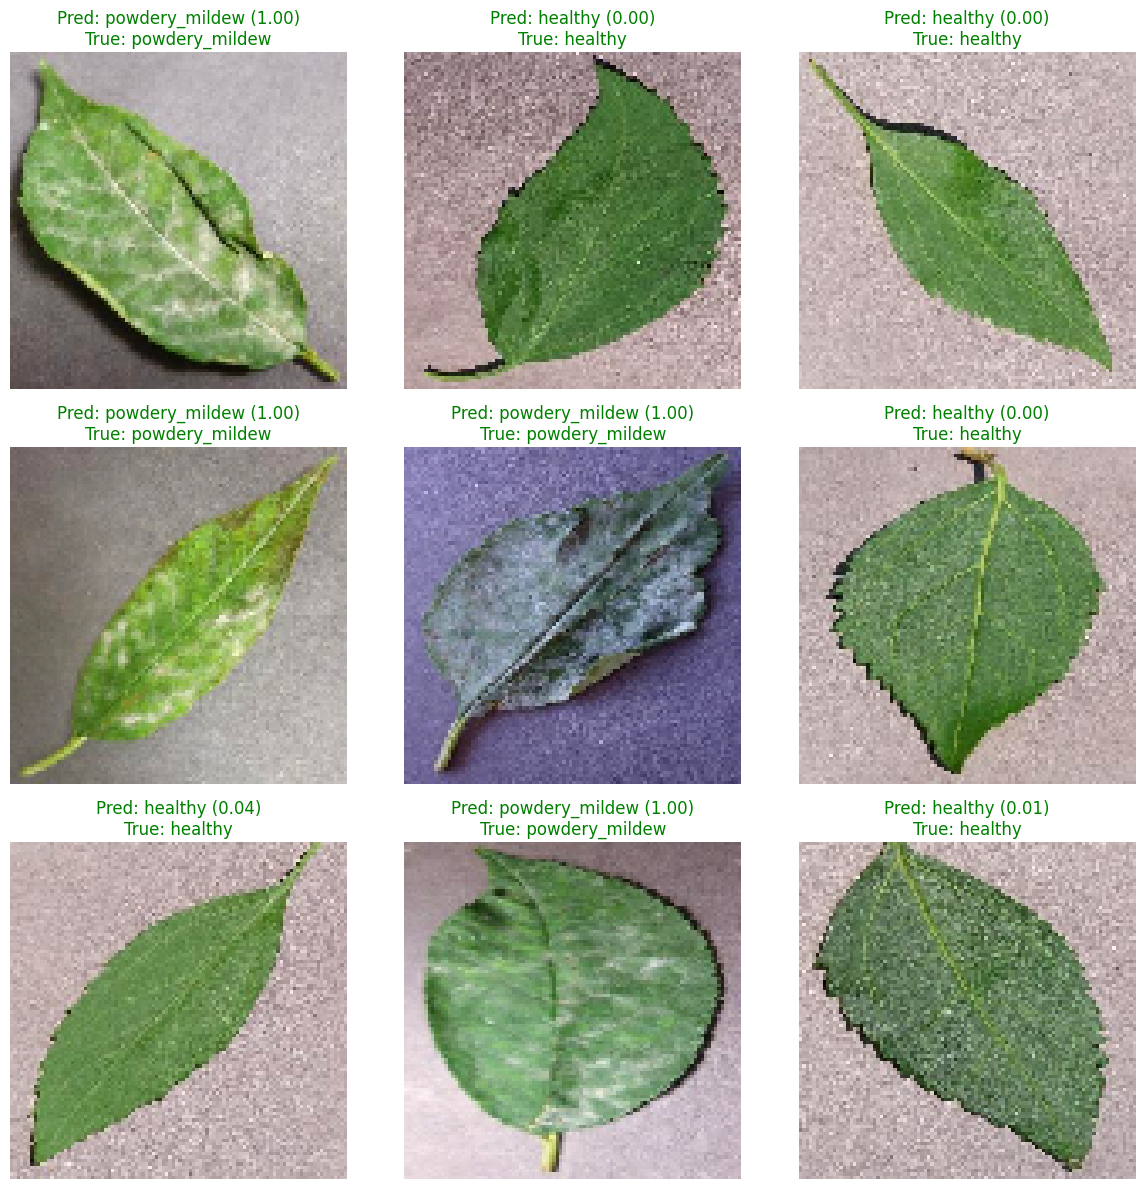

✅ Prediction image grid saved to: outputs/sample_predictions.png
✅ CSV with prediction results saved to: outputs/sample_prediction_results.csv


In [31]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Load image shape from pickle ===
with open('outputs/image_shape_1.pkl', 'rb') as f:
    image_shape = pickle.load(f)[:2]

# === Rebuild test generator ===
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory='inputs/leaves_dataset/cherry-leaves/processed_images/test',
    target_size=image_shape,
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# === Get a batch and make predictions ===
sample_images, sample_labels = next(test_generator)
filenames = test_generator.filenames[:len(sample_images)]
predictions = model.predict(sample_images)
predicted_classes = np.round(predictions).astype(int).flatten()
confidences = predictions.flatten()

# === Get class label names ===
class_names = list(train_set.class_indices.keys())

# === Plot predictions ===
N = 9
plt.figure(figsize=(12, 12))

for i in range(N):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
    
    true_label = class_names[int(sample_labels[i])]
    predicted_label = class_names[predicted_classes[i]]
    conf = confidences[i]

    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Pred: {predicted_label} ({conf:.2f})\nTrue: {true_label}", color=color)

plt.tight_layout()
save_path = "outputs/sample_predictions.png"
plt.savefig(save_path)
plt.show()

print(f"✅ Prediction image grid saved to: {save_path}")

# === Save to CSV ===
csv_data = []

for i in range(len(sample_images)):
    csv_data.append({
        'File': filenames[i],
        'True Label': class_names[int(sample_labels[i])],
        'Predicted Label': class_names[predicted_classes[i]],
        'Confidence': round(confidences[i], 4)
    })

csv_df = pd.DataFrame(csv_data)
csv_path = 'outputs/sample_prediction_results.csv'
csv_df.to_csv(csv_path, index=False)

print(f"✅ CSV with prediction results saved to: {csv_path}")

Identifying Edge Cases

In [32]:
# === Save to CSV, sorted by confidence (ascending) ===
csv_data = []

for i in range(len(sample_images)):
    csv_data.append({
        'File': filenames[i],
        'True Label': class_names[int(sample_labels[i])],
        'Predicted Label': class_names[predicted_classes[i]],
        'Confidence': round(confidences[i], 4)
    })

csv_df = pd.DataFrame(csv_data)

# Sort by confidence: lowest to highest
csv_df_sorted = csv_df.sort_values(by='Confidence', ascending=True)

# Save it
csv_path = 'outputs/sample_prediction_results_sorted.csv'
csv_df_sorted.to_csv(csv_path, index=False)

print(f"✅ Sorted CSV with edge-case insights saved to: {csv_path}")

✅ Sorted CSV with edge-case insights saved to: outputs/sample_prediction_results_sorted.csv
